<a href="https://colab.research.google.com/github/IsaganiJulian/Marketing_Campaign_DTSC/blob/main/Isagani_Copy_of_MarketingCampaignAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

marketing_data = pd.read_csv('/content/marketing_campaign_dataset.csv')
marketing_data

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10


In [205]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

### Data Types:

**Numerical**:
Campaign_ID: Unique identifier for each campaign.
Clicks, Impressions, Engagement_Score: Numerical counts.
Conversion_Rate, ROI: Numerical ratios or percentages.

**Categorical**:
Company, Campaign_Type, Target_Audience, Duration, Channel_Used, Acquisition_Cost, Location, Language, Customer_Segment, Date: Textual data.

In [206]:
marketing_data.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


### Data Cleaning

In [207]:
marketing_data.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [208]:
rows_with_nulls = marketing_data[marketing_data.isnull().any(axis=1)]
print(rows_with_nulls)

Empty DataFrame
Columns: [Campaign_ID, Company, Campaign_Type, Target_Audience, Duration, Channel_Used, Conversion_Rate, Acquisition_Cost, ROI, Location, Language, Clicks, Impressions, Engagement_Score, Customer_Segment, Date]
Index: []


In [209]:
marketing_data = marketing_data.drop(23279) # Drops row with index 23279
marketing_data = marketing_data.reset_index(drop=True) # Resets the index

In [210]:
# Convert Date to date time
marketing_data['Date'] = pd.to_datetime(marketing_data['Date'], errors='coerce')

# Convert Acquisition_Cost to numerical
marketing_data['Acquisition_Cost'] = marketing_data['Acquisition_Cost'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)

# Convert Duration to numerical and rename it Duration_Days
marketing_data['Duration_Days'] = marketing_data['Duration'].str.extract('(\d+)').astype(float).fillna(0).astype(int)
marketing_data = marketing_data.drop('Duration', axis=1, errors='ignore')

# Print data types
print(marketing_data.dtypes)

Campaign_ID                  int64
Company                     object
Campaign_Type               object
Target_Audience             object
Channel_Used                object
Conversion_Rate            float64
Acquisition_Cost           float64
ROI                        float64
Location                    object
Language                    object
Clicks                       int64
Impressions                  int64
Engagement_Score             int64
Customer_Segment            object
Date                datetime64[ns]
Duration_Days                int64
dtype: object


#### Identify Outliers

In [211]:
numeric_columns = ['Clicks', 'Impressions', 'Engagement_Score', 'Conversion_Rate', 'ROI', 'Acquisition_Cost', 'Duration_Days']

In [212]:
# Before handling outliers
print("Descriptive Statistics Before:")
print(marketing_data[numeric_columns].describe())

Descriptive Statistics Before:
              Clicks    Impressions  Engagement_Score  Conversion_Rate  \
count  199999.000000  199999.000000     199999.000000    199999.000000   
mean      549.774279    5507.322397          5.494727         0.080069   
std       260.017761    2596.853995          2.872578         0.040602   
min       100.000000    1000.000000          1.000000         0.010000   
25%       325.000000    3266.000000          3.000000         0.050000   
50%       550.000000    5518.000000          5.000000         0.080000   
75%       775.000000    7753.000000          8.000000         0.120000   
max      1000.000000   10000.000000         10.000000         0.150000   

                 ROI  Acquisition_Cost  Duration_Days  
count  199999.000000     199999.000000  199999.000000  
mean        5.002443      12504.427662      37.504088  
std         1.734491       4337.647755      16.746686  
min         2.000000       5000.000000      15.000000  
25%         3.500000  

In [213]:
# Function to handle the outliers in my df
def handle_outliers(df, column):
  """
  Detect and handle the outliers in the numeric columns using the IQR method.
  """

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

# Replace outliers with winsorization
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  return df

# Loop through numeric columns and handle outliers
for col in numeric_columns:
    marketing_data = handle_outliers(marketing_data, col)


In [214]:
# After handling outliers
print("\nDescriptive Statistics After:")
print(marketing_data[numeric_columns].describe())


Descriptive Statistics After:
              Clicks    Impressions  Engagement_Score  Conversion_Rate  \
count  199999.000000  199999.000000     199999.000000    199999.000000   
mean      549.774279    5507.322397          5.494727         0.080069   
std       260.017761    2596.853995          2.872578         0.040602   
min       100.000000    1000.000000          1.000000         0.010000   
25%       325.000000    3266.000000          3.000000         0.050000   
50%       550.000000    5518.000000          5.000000         0.080000   
75%       775.000000    7753.000000          8.000000         0.120000   
max      1000.000000   10000.000000         10.000000         0.150000   

                 ROI  Acquisition_Cost  Duration_Days  
count  199999.000000     199999.000000  199999.000000  
mean        5.002443      12504.427662      37.504088  
std         1.734491       4337.647755      16.746686  
min         2.000000       5000.000000      15.000000  
25%         3.500000  

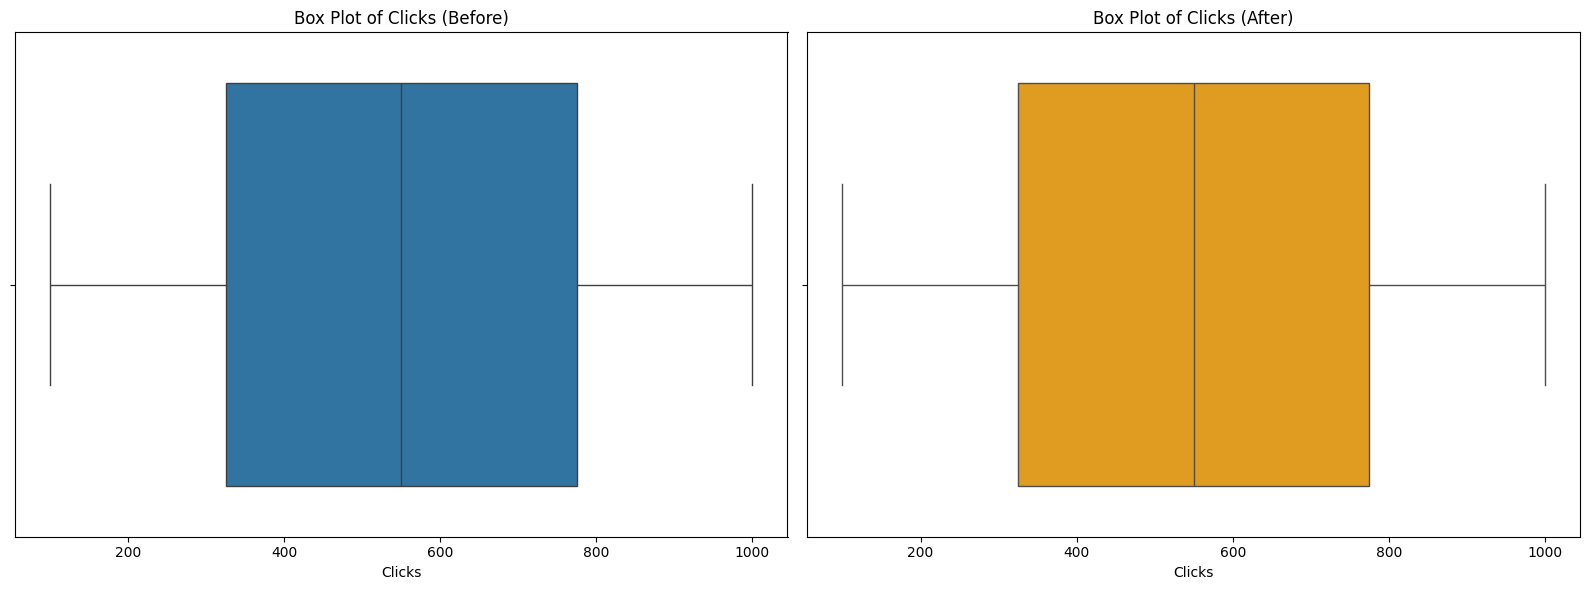

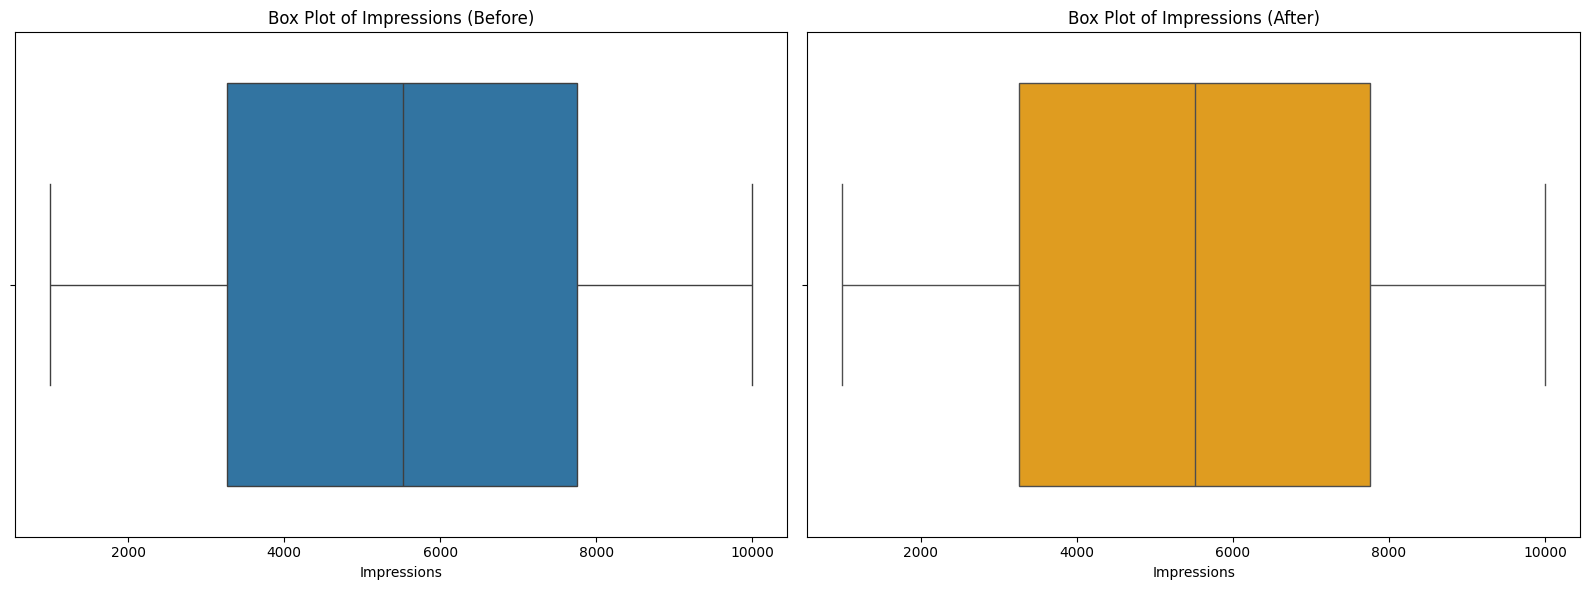

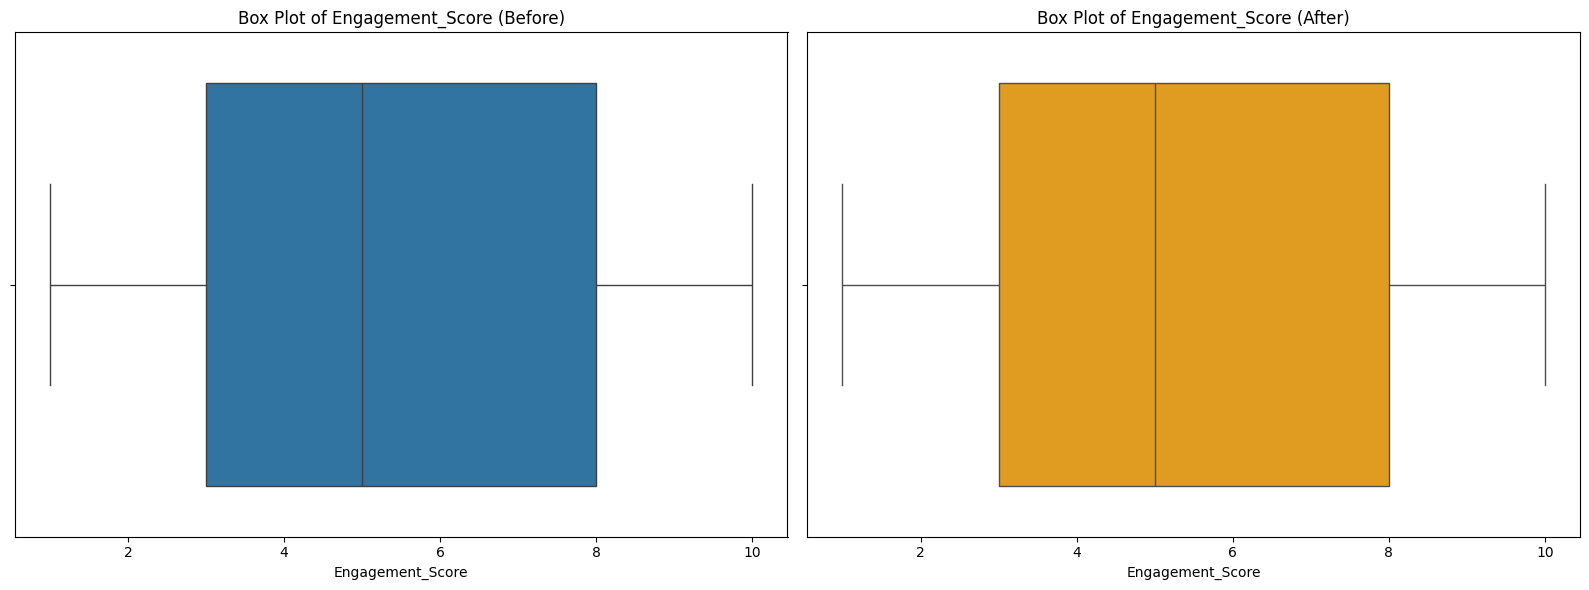

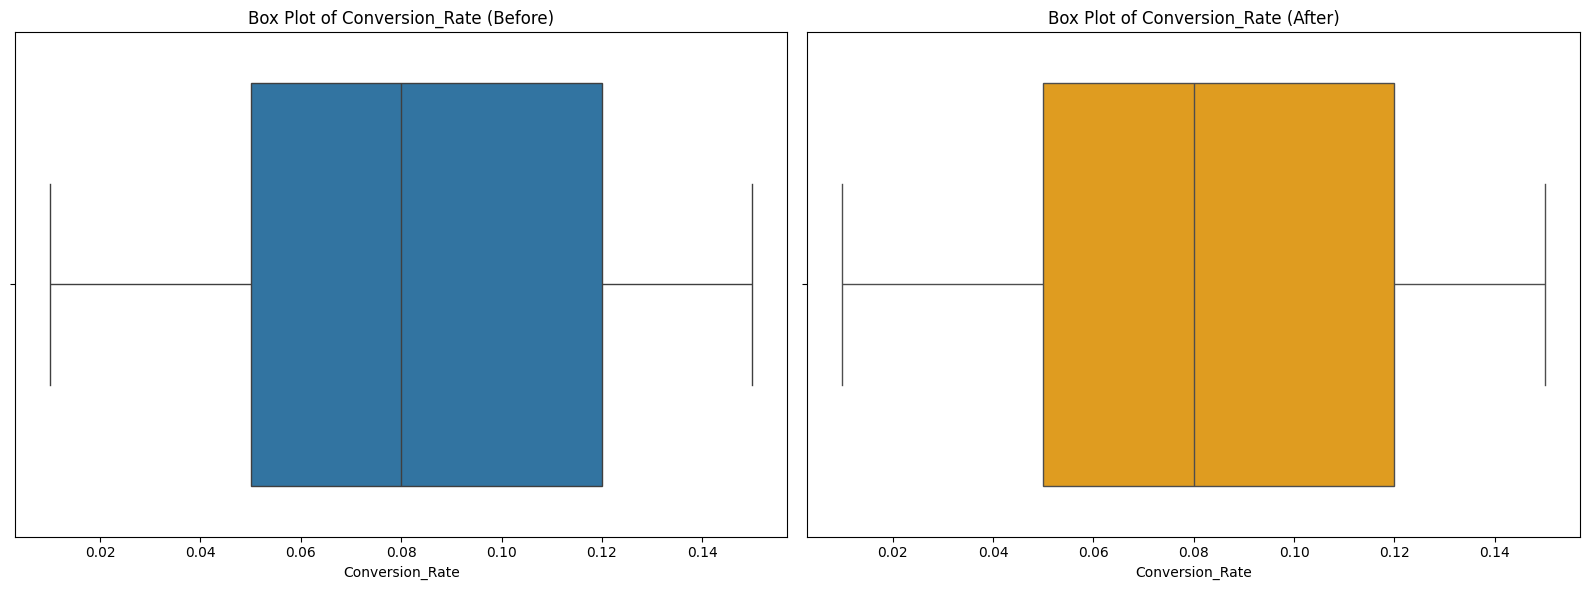

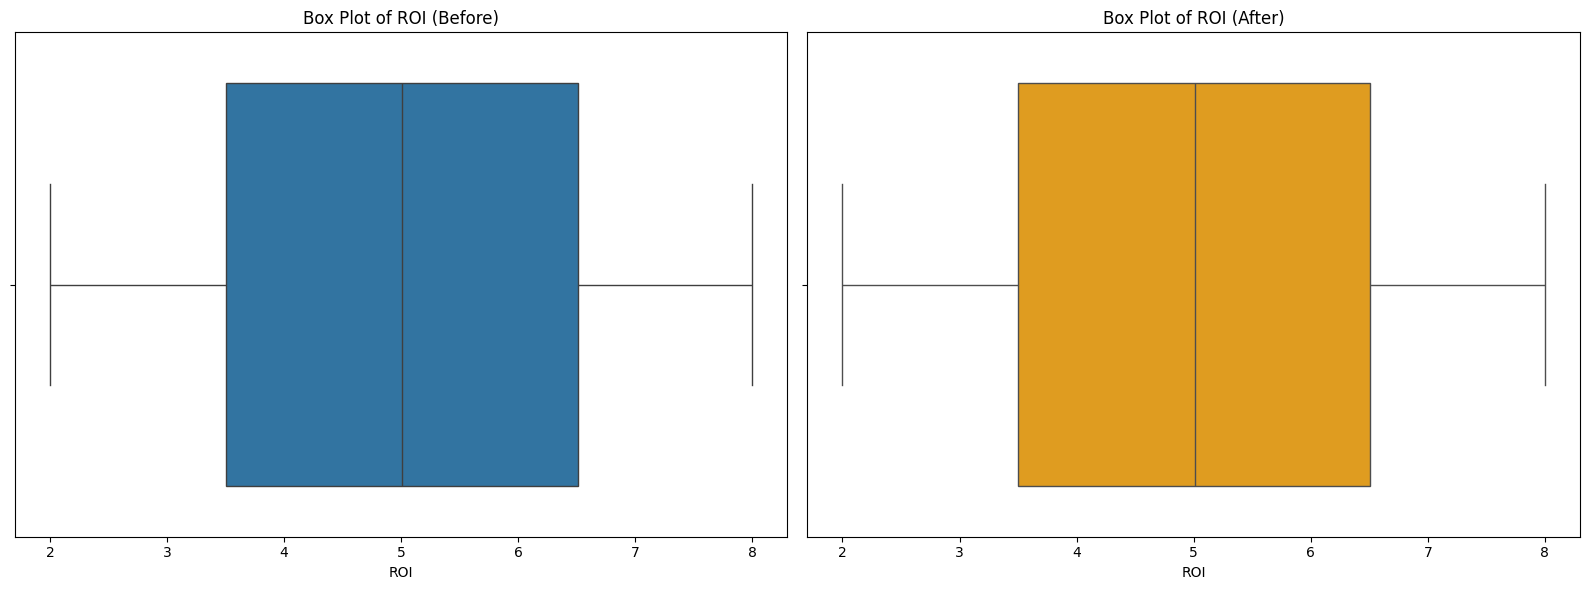

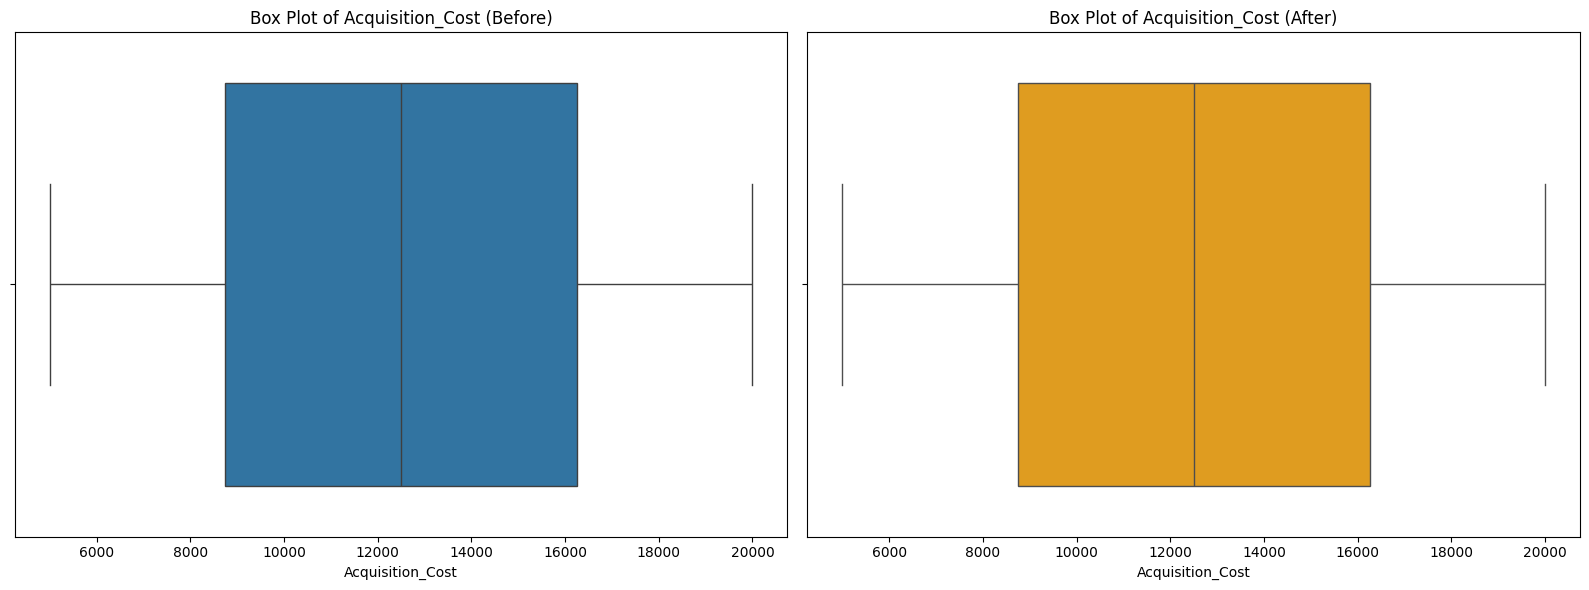

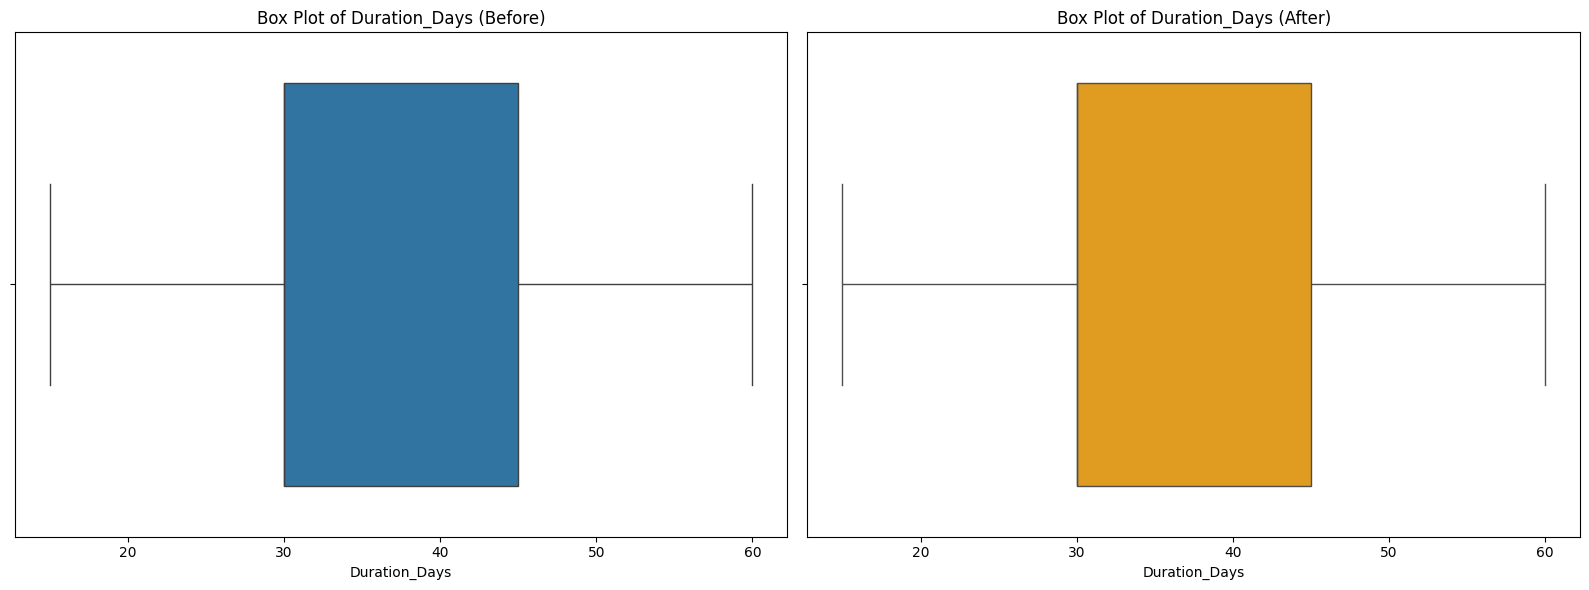

In [215]:
# Create a figure with two subplots (side-by-side)
for col in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

    # Box plot before outlier handling
    sns.boxplot(x=marketing_data[col], ax=axes[0])  # Plot on the first subplot
    axes[0].set_title(f'Box Plot of {col} (Before)')

    # Assuming you have a 'marketing_data_cleaned' DataFrame after outlier handling
    sns.boxplot(x=marketing_data[col], ax=axes[1], color='orange')  # Plot on the second subplot
    axes[1].set_title(f'Box Plot of {col} (After)')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

- Outlier Analysis: We examined the distribution of numeric variables using box plots and descriptive statistics. No significant outliers were detected, suggesting that the data points are within an expected range. Therefore, we proceeded with further analysis without applying outlier handling techniques.

In [216]:
# Target_Audience data clean and feature engineering

# Create new columns for Men and Women
marketing_data['Men'] = marketing_data['Target_Audience'].apply(lambda x: True if 'men' in x.lower() or x.lower() == 'all ages' else False)
marketing_data['Women'] = marketing_data['Target_Audience'].apply(lambda x: True if 'women' in x.lower() or x.lower() == 'all ages' else False)

# Extract age range using regex
marketing_data['Age_Range'] = marketing_data['Target_Audience'].str.extract(r'(\d+-\d+)')

# Fill NaN with "All Ages"
marketing_data['Age_Range'] = marketing_data['Age_Range'].fillna('All Ages')

# Display the updated DataFrame
marketing_data[['Target_Audience', 'Men', 'Women', 'Age_Range']].head()

,Target_Audience,Men,Women,Age_Range
0,Men 18-24,True,False,18-24
1,Women 35-44,True,True,35-44
2,Men 25-34,True,False,25-34
3,All Ages,True,True,All Ages
4,Men 25-34,True,False,25-34


In [184]:
# Drop Target_Audience
marketing_data = marketing_data.drop('Target_Audience', axis=1)
marketing_data.head()

,Campaign_ID,Company,Campaign_Type,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Duration_Days,Men,Women,Age_Range
0,1,Innovate Industries,Email,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506.0,1922.0,6.0,Health & Wellness,2021-01-01,30.0,True,False,18-24
1,2,NexGen Systems,Email,Google Ads,0.12,11566.0,5.61,New York,German,116.0,7523.0,7.0,Fashionistas,2021-01-02,60.0,False,True,35-44
2,3,Alpha Innovations,Influencer,YouTube,0.07,10200.0,7.18,Los Angeles,French,584.0,7698.0,1.0,Outdoor Adventurers,2021-01-03,30.0,True,False,25-34
3,4,DataTech Solutions,Display,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217.0,1820.0,7.0,Health & Wellness,2021-01-04,60.0,False,False,All Ages
4,5,NexGen Systems,Email,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379.0,4201.0,3.0,Health & Wellness,2021-01-05,15.0,True,False,25-34


## EDA
- How does the campaign affect the performance of key metrics (clicks, impressions, engagement_score, conversion rate, and ROI)
- What is the optimal campaign duration, 15, 30, 45, or 60 days?
- Does the campaign duration affect the target audience?

In [185]:
# Group by duration
duration_groups = marketing_data.groupby('Duration_Days')

# Calculate mean clicks for each duration group
mean_clicks_duration = duration_groups['Clicks'].mean()
print("Mean Clicks by Duration:")
print(mean_clicks_duration)

# Calculate mean impressions for each duration group
mean_impressions_duration = duration_groups['Impressions'].mean()
print("\nMean Impressions by Duration:")
print(mean_impressions_duration)

# Calculate mean engagement score for each duration group
mean_engagement_score_duration = duration_groups['Engagement_Score'].mean()
print("\nMean Engagement Score by Duration:")
print(mean_engagement_score_duration)

Mean Clicks by Duration:
Duration_Days
15.0    550.254369
30.0    550.211183
45.0    549.166806
60.0    549.465046
Name: Clicks, dtype: float64

Mean Impressions by Duration:
Duration_Days
15.0    5539.132830
30.0    5494.852791
45.0    5510.829541
60.0    5484.611378
Name: Impressions, dtype: float64

Mean Engagement Score by Duration:
Duration_Days
15.0    5.502330
30.0    5.505064
45.0    5.489960
60.0    5.481510
Name: Engagement_Score, dtype: float64


Duration does not significantly affect clicks, impressions, and engagement scores. We now assess the effect of the campaign type by duration for the clicks, impressions, and engagement scores.

In [186]:
# Create a pivot table for clicks by campaign type and duration
mean_clicks_pivot = marketing_data.pivot_table(values='Clicks', index='Campaign_Type', columns='Duration_Days', aggfunc='mean')
print("Mean Clicks by Campaign Type and Duration:")
print(mean_clicks_pivot)

Mean Clicks by Campaign Type and Duration:
Duration_Days        15.0        30.0        45.0        60.0
Campaign_Type                                                
Display        547.880268  552.777944  554.508826  548.643331
Email          554.781469  547.507065  545.064370  549.547543
Influencer     548.609705  548.227741  546.960423  550.772040
Search         546.776905  551.460614  548.280913  548.010912
Social Media   553.187192  551.092454  551.012631  550.376068


In [187]:
# Create a pivot table for impressions by campaign type and duration
mean_impressions_pivot = marketing_data.pivot_table(values='Impressions', index='Campaign_Type', columns='Duration_Days', aggfunc='mean')
print("\nMean Impressions by Campaign Type and Duration:")
print(mean_impressions_pivot)


Mean Impressions by Campaign Type and Duration:
Duration_Days         15.0         30.0         45.0         60.0
Campaign_Type                                                    
Display        5519.233873  5462.088982  5544.471414  5489.067899
Email          5560.088653  5509.498848  5527.914173  5488.716951
Influencer     5554.458749  5472.679984  5486.672814  5470.667238
Search         5545.605019  5531.490941  5484.893743  5493.808253
Social Media   5516.232605  5498.575460  5510.799702  5480.612066


In [188]:
# Create a pivot table for engagement score by campaign type and duration
mean_engagement_score_pivot = marketing_data.pivot_table(values='Engagement_Score', index='Campaign_Type', columns='Duration_Days', aggfunc='mean')
print("\nMean Engagement Score by Campaign Type and Duration:")
print(mean_engagement_score_pivot)


Mean Engagement Score by Campaign Type and Duration:
Duration_Days      15.0      30.0      45.0      60.0
Campaign_Type                                        
Display        5.530757  5.515079  5.504012  5.473483
Email          5.522914  5.514080  5.466203  5.495085
Influencer     5.463332  5.484834  5.497956  5.486786
Search         5.494236  5.491237  5.488188  5.475052
Social Media   5.500352  5.520838  5.493287  5.477225


The mean scores based on campaign type and duration do not show much variance.

In [189]:
gender_groups = marketing_data.groupby(['Men', 'Women'])[['Clicks', 'Impressions', 'Engagement_Score']]
gender_groups.mean()

Clicks  Impressions  Engagement_Score
Men   Women                                           
False False  548.871811  5506.193108          5.487094
      True   550.544737  5514.387094          5.489680
True  False  549.459274  5500.871850          5.503544